# Project: Movies Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
In this jupyter notebook we are exploring **movies dataset**. Movies dataset contains data of more than 10000 movies from 1966 to 2015. Let us draw some useful insights from it.

In [30]:
##Importing Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('white')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline
df = pd.read_csv('movies_data.csv') ##Setting up a pandas dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

<a id='wrangling'></a>
## Data Wrangling
### General Properties

In [31]:
##Loading the data frame
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [32]:
df.columns ##Checking all the columns in df

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [33]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [34]:
sum(df.duplicated()) ##To check duplicate rows in df

1

### Data Cleaning
There are way too many columns in this dataset. I am removing all the columns, which are not relevant to this project.
Removing Columns:-
1. **cast**
2. **homepage**
3. **tagline**
4. **keywords**
5. **overview**
6. **release date** Release year is already given, we don't need release date.

In [35]:
df.drop(['cast','homepage','tagline','keywords','overview','release_date'],axis=1,inplace=True) ##Removing Columns that are not required
df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08


Here, I am dividing vote average into 4 popular categories, into a new column **vote_category**.

|**Bin_size**|**Category**|
|------------|------------|
|**1-5**     | Bad        |
|**6-7**     | Okay       |
|**8-9**     | Good       |
|**9-10**    | Amazing    |

In [36]:
##Dividing the vote_average with 4 categories
bin_edges = [1,5,7,9,10]
bin_names = ['bad','okay','good','amazing']
df['vote_category'] = pd.cut(df['vote_average'],bin_edges,labels=bin_names)

Cleaning column **"genres"** by removing "|" character from the column

In [37]:
df_pipe = df[df['genres'].str.contains('\\|',na=False)] ##Rows that contains pipe character in 'genres' column
##Making copies of data with pipe character
df1 = df_pipe.copy()
df2 = df_pipe.copy()
df3 = df_pipe.copy()
df4 = df_pipe.copy()
##Using lambda to split all the values of column 'genres'
df1['genres'] = df1['genres'].apply(lambda x: x.split('|')[0])
df2['genres'] = df2['genres'].apply(lambda x: x.split('|')[1])
df3['genres'] = df3['genres'].apply(lambda x: x.split('|')[-1])
df4['genres'] = df4['genres'].apply(lambda x: x.split('|')[-2])

In [38]:
df1.head(2)##To check if pipe characters are removed

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_category
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Action,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,okay
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Action,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,good


In [34]:
df2.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_category
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Adventure,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,okay
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Adventure,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,good


In [35]:
df3.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_category
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,okay
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,good


In [36]:
df4.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_category
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,124,Science Fiction,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,okay
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,120,Science Fiction,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,good


In [39]:
rows1 = df1.append(df2)
rows2 = df3.append(df3)
rows = rows1.append(rows2)
df.drop(df_pipe.index,inplace=True)##Dropping rows with pipe character
df = df.append(rows,ignore_index=True)##Appending the clean data

In [40]:
df[df['genres'].str.contains('\\|',na=False)]

,id,imdb_id,popularity,budget,revenue,original_title,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,vote_category


In [41]:
sum(df.duplicated())

11954

In [12]:
df.shape

(36411, 16)

In [42]:
df.drop_duplicates(inplace=True) ##Removing all the duplicates

In [43]:
sum(df.duplicated())

0

<a id='eda'></a>
## Exploratory Data Analysis
### Research Question 1: Is revenue data of all the movies in the dataset is normaly distributed or skewed? Also provide the descriptive statistics for the revenue data?
**Answer**: Revenue data is positively skewed. There are way too many **zero** values, as a result median is also zero for the revenue. Below I have created a violin plot and a histogram to clearly show the skewness in data.

|Descriptive Statistics
|:-:
|**Mean**  |**Median**|**Min**|**Max**
|58591178.71|0|0|2827123750.41

In [15]:
df['revenue_adj'].describe()

count    2.445700e+04
mean     5.859118e+07
std      1.589176e+08
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      4.068487e+07
max      2.827124e+09
Name: revenue_adj, dtype: float64

0.0

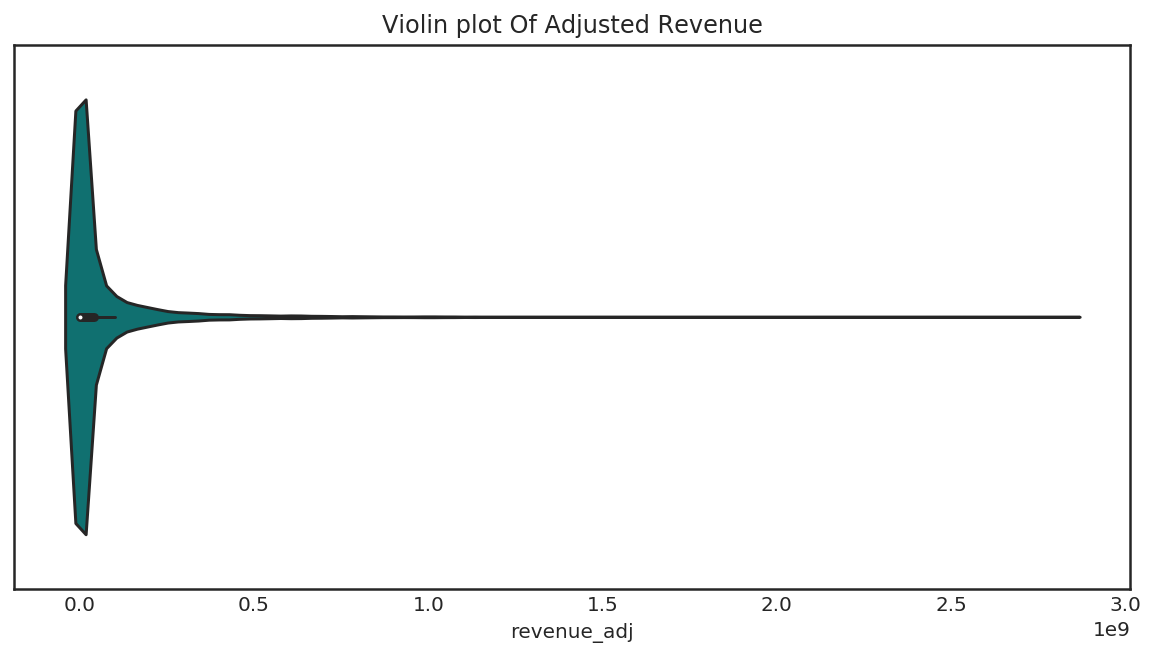

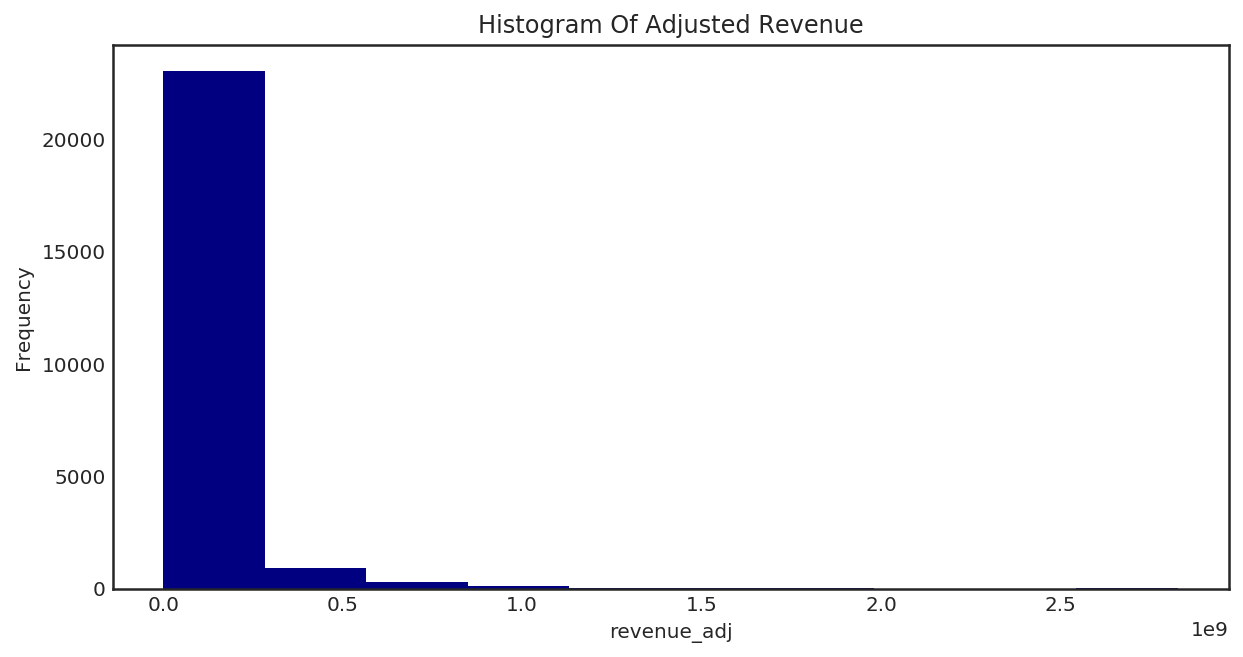

In [45]:
plt.rcParams["figure.figsize"] = (10,5) ##To increase the figure size
plt.figure(1)
plt.title('Violin plot Of Adjusted Revenue')
sns.violinplot(df['revenue_adj'],color='teal');
plt.figure(2)
revenue = df['revenue_adj']
plt.xlabel('revenue_adj')
plt.title('Histogram Of Adjusted Revenue')
revenue.plot(kind='hist',color='navy');
np.median(df['revenue_adj'])

From the violin plot and histogram, it is clear that revenue data is skewed.

### Research Question 2: What impact does popularity have on revenue?
**Answer**: By looking at the scatter plot, it is hard to conclude that popularity has **any** impact on revenue.

Text(0,0.5,'revenue_adj')

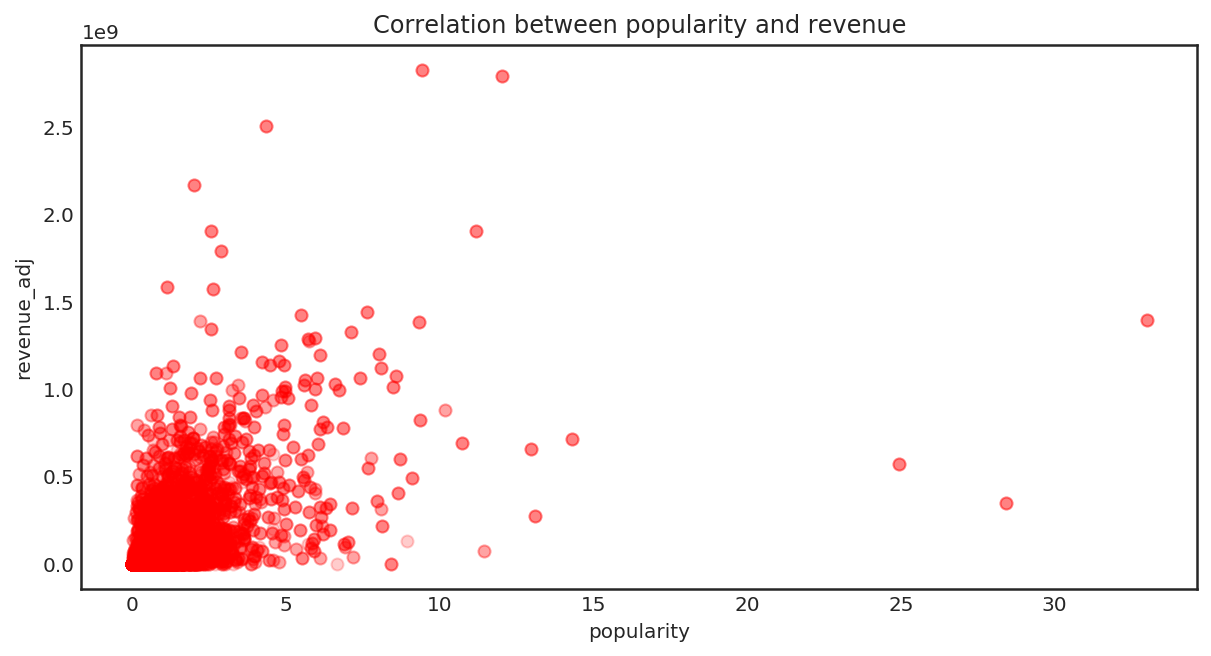

In [46]:
Popularity = df['popularity']
Revenue = df['revenue_adj']
plt.scatter(Popularity, Revenue, color='r',alpha=0.2); ##Creating scatter plot for popularity and revenue
plt.title('Correlation between popularity and revenue')
plt.xlabel('popularity')
plt.ylabel('revenue_adj')

From the scatter plot, it is hard to conclude any correlation between revenue and popularity.

### Research Question 3: Which genres of movies are generating the highest average revenue?
**Answer**: 'Adventure' is generating the highest average revenue. Followed by 'Fantasy' and 'Action'.

Text(0,0.5,'Mean Revenue')

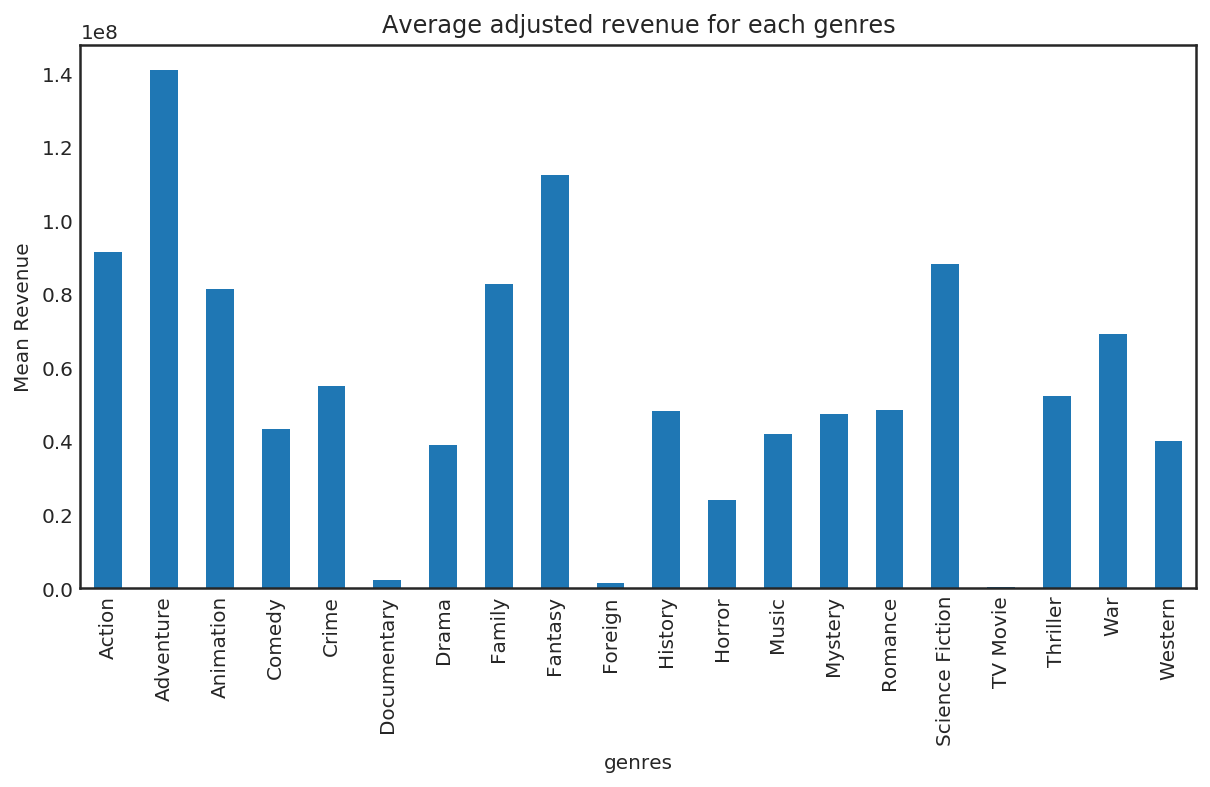

In [47]:
Genres = df.groupby('genres')['revenue_adj'].mean() ##Getting mean adjusted revenue of each genres
Genres.plot(kind='bar');
plt.title('Average adjusted revenue for each genres')
plt.ylabel('Mean Revenue')

This chart is representing all the genres and how much revenue they are generating on average.

### Research Question 4: Is budget data of all the movies in the dataset is normaly distributed or skewed? Also provide the descriptive statistics for the budget data?
**Answer**: Budget data is also positively skewed, just like revenue data. I have created a violin plot and a histogram to visualize the skewness.

|**Deccriptive Statistics**
|--
|**Mean**|**Median**|**Min**|**Max**
|19994745.56|0|0|425000000

In [21]:
df['budget_adj'].describe()

count    2.445700e+04
mean     1.999475e+07
std      3.711206e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      2.531967e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

Text(0.5,0,'budget_adj')

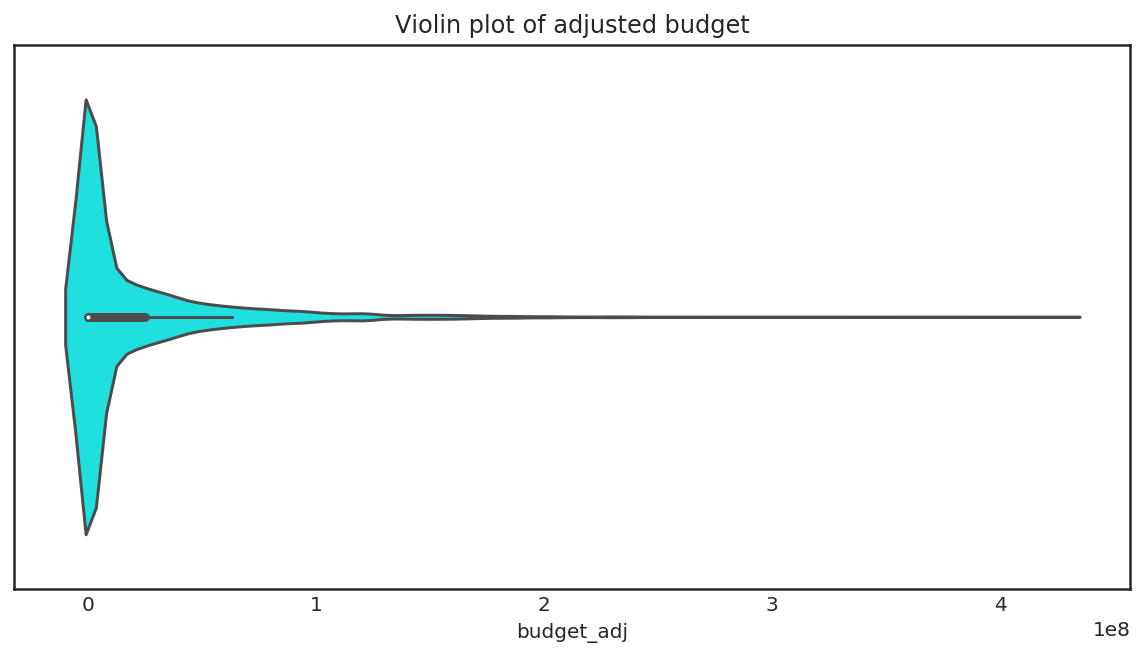

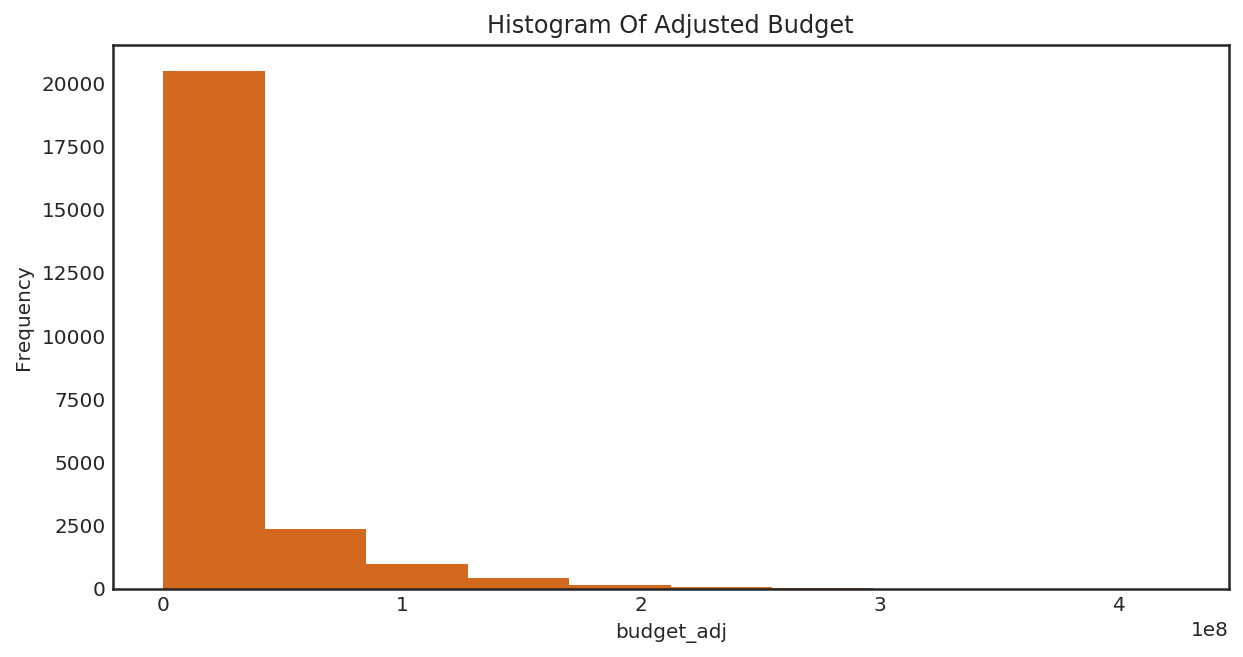

In [48]:
plt.figure(1)
sns.violinplot(df['budget_adj'],color='aqua');
plt.title('Violin plot of adjusted budget')
plt.figure(2)
budget = df['budget_adj']
budget.plot(kind='hist',color='chocolate');
plt.title('Histogram Of Adjusted Budget')
plt.xlabel('budget_adj')

Both the violin plot and histogram are clearly showing, that budget data is positively skewed.

### Research Question 5: Is there a correlation between buget and revenues of the movies?
**Answer**: Except from the few outliers, it is hard to say revenues are correlated with budgets of the movies.

Text(0,0.5,'revenue_adj')

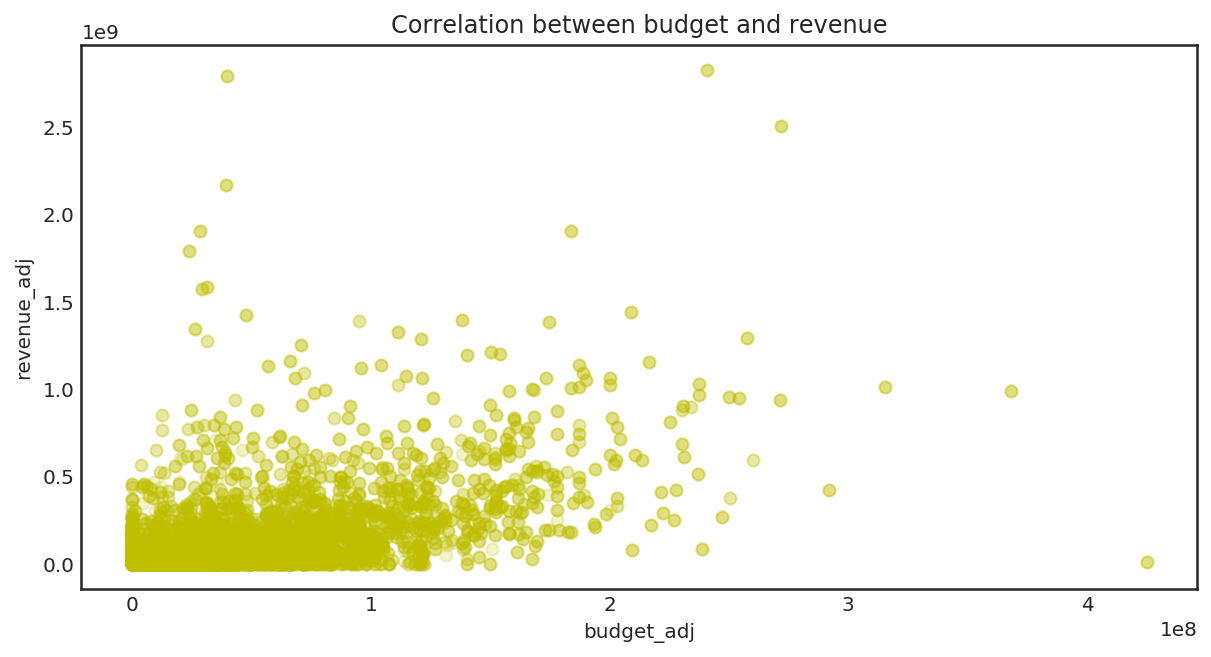

In [49]:
Budget = df['budget_adj']
plt.scatter(Budget,Revenue,color='y',alpha=0.2);
plt.title('Correlation between budget and revenue')
plt.xlabel('budget_adj')
plt.ylabel('revenue_adj')

There are way too many values near zero, so it is difficult to measure the correlation.

### Research Question 6: How many movies are there of each vote category?
**Note**: By using pandas cut function above. I have divided **vote_average** into 4 popular categories. Here is a distribution of movies in each category.

|**Bin_size**|**Category**|
|------------|------------|
|**1-5**     | Bad        |
|**6-7**     | Okay       |
|**8-9**     | Good       |
|**9-10**    | Amazing    |

vote_category
bad         3624
okay       18194
good        2638
amazing        1
Name: original_title, dtype: int64

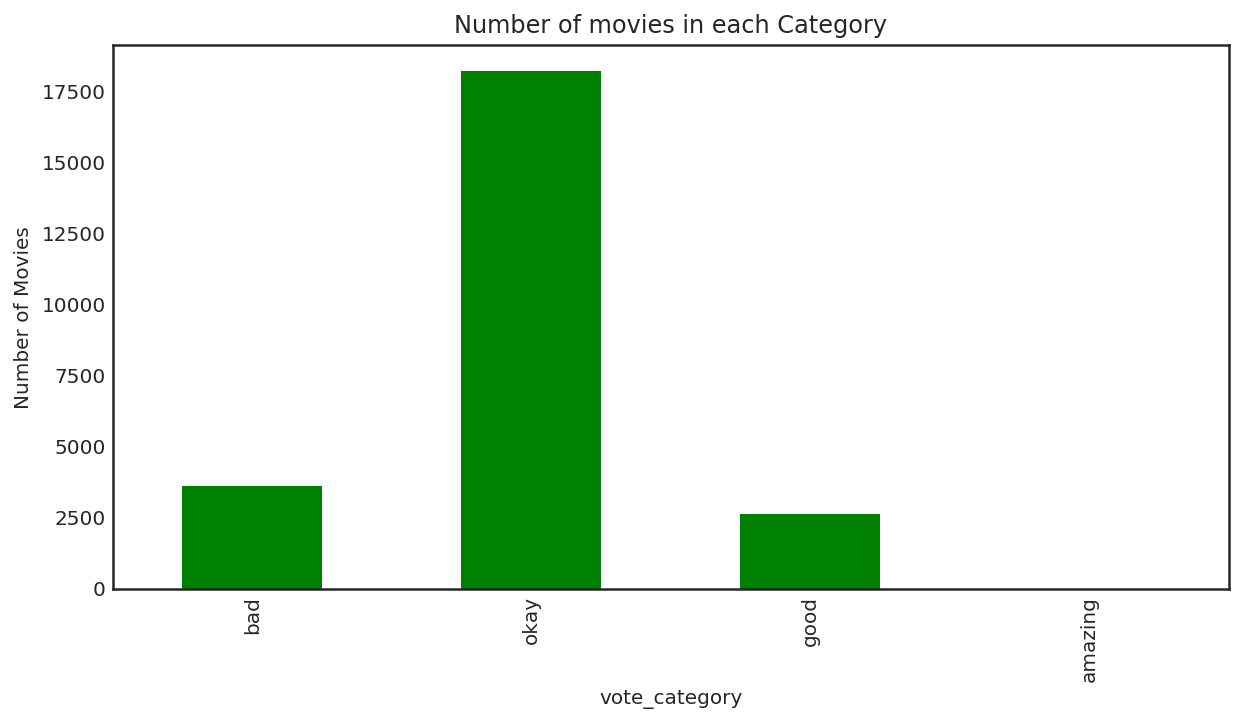

In [50]:
categories = df.groupby('vote_category')['original_title'].count()
categories.plot(kind='bar',color='g',figsize=(10,5),title='Number of movies in each Category');
plt.ylabel('Number of Movies')
categories

From the bar chart, it is clear that most movies are falling between 6-7 vote average.

### Research Question 7: Which genres of movies are getting released the most?
**Answer**: From the line chart. **Comedy** movies are getting released the most, followed by the **Action** movies.

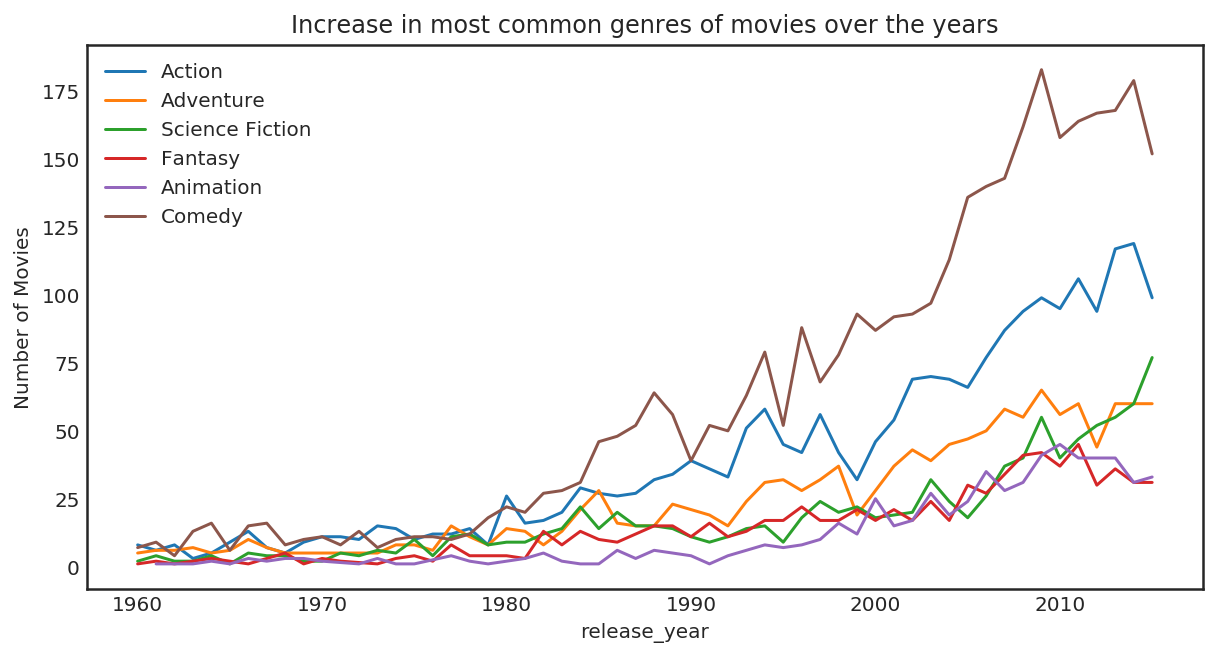

In [51]:
##Counting movies of 6 most common genres
Action = df.query('genres == "Action"').groupby('release_year').count()['original_title']
Adventure = df.query('genres == "Adventure"').groupby('release_year').count()['original_title']
Science_fiction = df.query('genres == "Science Fiction"').groupby('release_year').count()['original_title']
Fantasy = df.query('genres == "Fantasy"').groupby('release_year').count()['original_title']
Animation = df.query('genres == "Animation"').groupby('release_year').count()['original_title']
Comedy = df.query('genres == "Comedy"').groupby('release_year').count()['original_title']
##Plotiing different genres of movies
plt.plot(Action,label='Action');
plt.plot(Adventure,label='Adventure');
plt.plot(Science_fiction,label='Science Fiction');
plt.plot(Fantasy,label='Fantasy');
plt.plot(Animation,label='Animation');
plt.plot(Comedy,label='Comedy');
plt.title('Increase in most common genres of movies over the years')
plt.xlabel('release_year')
plt.ylabel('Number of Movies')
plt.legend()

There are too many unique genres of movies, so this chart represent the most 6 popular ones.

### Research Question 8: Over the years, Is number of movies releasing are steadily increasing?
**Answer**: If we go from decade to decade, then **yes**. Number of movies releasing are increasing steadily from 1980.

Text(0,0.5,'Number of Movies')

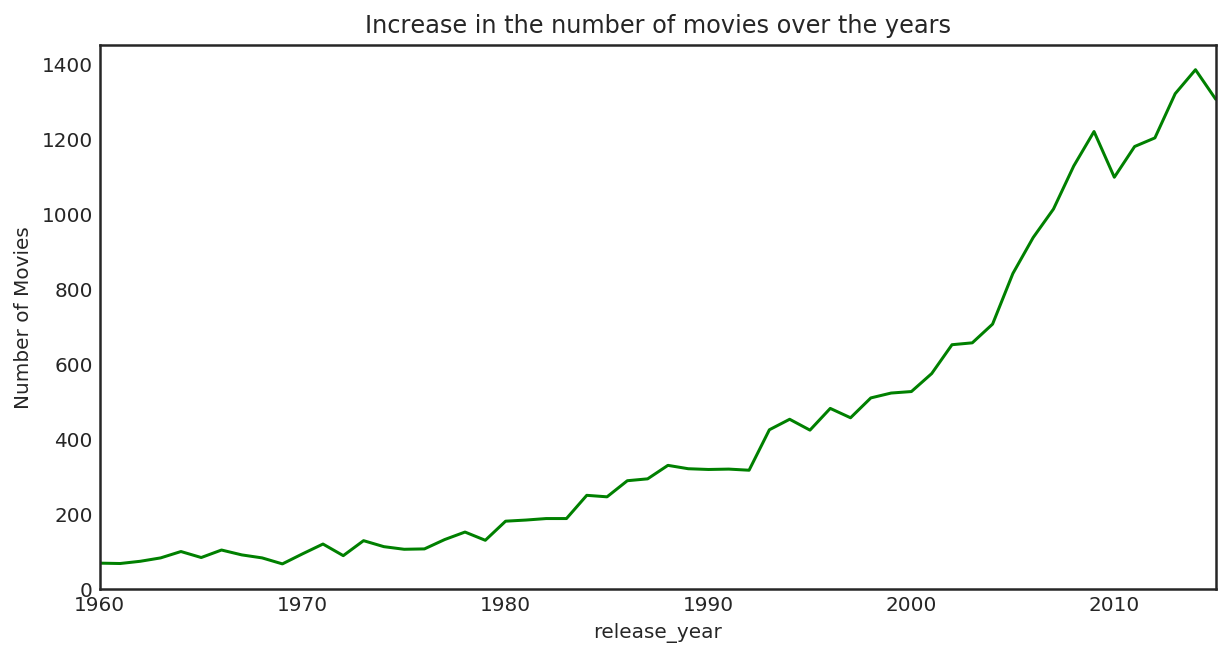

In [52]:
movies_count = df.groupby('release_year')['original_title'].count()
movies_count.plot(kind='line',color='g');
plt.title('Increase in the number of movies over the years')
plt.ylabel('Number of Movies')

This line chart is showing the rise in the number of movies releasing from 1960.

<a id='conclusions'></a>
## Conclusions
Here are the key findings from this dataset:
1. On average **adventure** movies are generating the highest revenue, followed by **fantasy**.
2. More than 50% of movies falls between vote_average of 6-7.
3. Since 1980, there is a significant increase in number of movies releasing in every 10 years.
4. With minor fluctuation, number of **comedy** movies releasing is steadily increasing, followed by the **action** movies.
5. The maximum value for revenue is 2827123750.41.
6. The maximum value for budget is 425000000.

**Limitations**
1. There are way too many **zero** values in revenue and budget column, as a result distribution is skewed. It is impossible to **precisely** conclude anything from these 2 columns.
2. There is no location wise data. Therefore, we cannot analyse from which country or state the movie is grossing the most.

In [53]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0